In [1]:
# manipulacja danymi
import numpy as np
import pandas as pd
import os
import requests

# wizualizacja danych
import matplotlib.pyplot as plt
import seaborn as sns

# statystyczna analiza danych
from scipy import stats

# Pobranie pliku csv jesli nie istnieje
def get_csv_file_name_from_url(url):
    return url.split("/")[-1]
def download_csv_file(url):
    csv_file = get_csv_file_name_from_url(url)
    if not os.path.exists(csv_file):
        response = requests.get(url)
        if response.status_code == 200:
            with open(csv_file, "wb") as file:
                file.write(response.content)
            print("CSV file downloaded successfully.")
        else:
            print("Failed to download CSV file.")
    else:
        print("CSV file already exists.")

download_csv_file("https://uploads.kodilla.com/bootcamp/ds/10/titanic.csv")

# przygotowanie danych
from sklearn.preprocessing import StandardScaler, MinMaxScaler
dataset = pd.read_csv('titanic.csv')
dataset

CSV file downloaded successfully.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Obliczanie średniej dla zmiennej Fare

In [8]:
average_fare = np.round(dataset['Fare'].mean(),2)
average_fare

np.float64(32.2)

Mediana i kwartyle

In [20]:
median_fare = np.round(dataset['Fare'].median(),2)
Q0 = dataset['Fare'].quantile(0)
Q1 = dataset['Fare'].quantile(0.25)
Q3 = dataset['Fare'].quantile(0.75)
Q4 = dataset['Fare'].quantile(1)
IQR = Q3 - Q1

Moda

In [16]:
mode_fare = stats.mode(dataset['Fare'])

Histogram

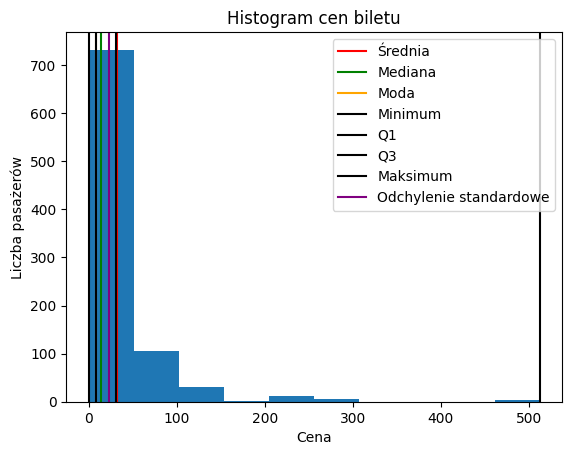

In [22]:
plt.hist(dataset['Fare'], bins=10)
plt.axvline(x = average_fare, color='red', label = 'Średnia')
plt.axvline(x = median_fare, color='green', label = 'Mediana')
plt.axvline(x = mode_fare[0], color='orange', label = 'Moda')
plt.axvline(x = Q0, color='black', label = 'Minimum')
plt.axvline(x = Q1, color='black', label = 'Q1')
plt.axvline(x = Q3, color='black', label = 'Q3')
plt.axvline(x = Q4, color='black', label = 'Maksimum')
plt.axvline(x = IQR, color='purple', label = 'Odchylenie standardowe')

plt.xlabel('Cena')
plt.ylabel('Liczba pasażerów')
plt.title('Histogram cen biletu')
plt.legend(loc='upper right')
plt.show()

Wykres pudełkowy

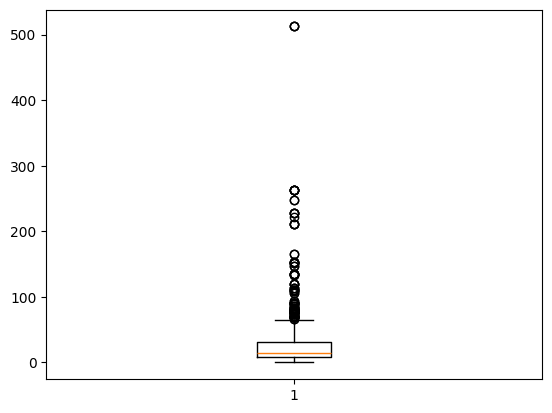

In [23]:
plt.boxplot(dataset['Fare'])
plt.show()